In [1]:
import os
import numpy as np
import siibra
from tvb.simulator.lab import *

[siibra:INFO] Version: 0.3a24
[siibra:WARNING] This is a development release. Use at your own risk.
[siibra:INFO] Please file bugs and issues at https://github.com/FZJ-INM1-BDA/siibra-python.


In [2]:
# Add an EBRAINS token
os.environ['HBP_AUTH_TOKEN'] = ''

In [3]:
# get desired brain parcellation
atlas = siibra.atlases["human"]
jubrain = atlas.get_parcellation("julich 2.9")

---

### Receptor densities

#### • Groupped per region
#### • Each region has density measurments for different types of receptors
#### • Some regions have multiple measurements for same receptors

In [4]:
# If we query this modality for the whole atlas instead of a particular
# brain region, all linked receptor density features
# will be returned.
all_features = siibra.get_features(atlas, siibra.modalities.ReceptorDistribution)
print("Receptor density features found for the following regions:")
receptor_regs = [f.regionspec for f in all_features]
print(*receptor_regs, sep='\n')

[siibra:INFO] 12 receptor datasets skipped due to unsupported format.


   INFO  12 receptor datasets skipped due to unsupported format.
Receptor density features found for the following regions:
Area ifs1 (IFS)
Area 4p (PreCG)
Area 3b (PostCG)
DG (Hippocampus)
Area FG2 (FusG)
Area 45 (IFG)
CA1 (Hippocampus)
Area hOc3v (LingG)
Area hOc1 (V1, 17, CalcS)
Area 44 (IFG)
Area PGp (IPL)
Area PFm (IPL)
CA3 (Hippocampus)
CA2 (Hippocampus)
CA1 (Hippocampus)
Area hOc3d (Cuneus)
Area 7A (SPL)
Area 44 (IFG)
Area hOc2 (V2, 18)
Area PFop (IPL)
Area PF (IPL)
CA2 (Hippocampus)
Area PFt (IPL)
Area TE 2.1 (STG)
Area PFcm (IPL)
CA3 (Hippocampus)
DG (Hippocampus)
Area ifj1 (IFS/PreCS)
CA3 (Hippocampus)
CA2 (Hippocampus)
CA1 (Hippocampus)
Area ifs4 (IFS)
CA3 (Hippocampus)
CA2 (Hippocampus)
CA1 (Hippocampus)
Area FG1 (FusG)
CA3 (Hippocampus)
Area ifs2 (IFS)
Area TE 1.0 (HESCHL)
CA1 (Hippocampus)
Area hOc2 (V2, 18)
Area ifs3 (IFS)
CA2 (Hippocampus)
Area ifj2  (IFS/PreCS)
CA3 (Hippocampus)
CA2 (Hippocampus)
CA1 (Hippocampus)
Area PGa (IPL)


[siibra:INFO] No parcellation specified, using default 'Julich-Brain Cytoarchitectonic Maps 2.9'.


   INFO  No parcellation specified, using default 'Julich-Brain Cytoarchitectonic Maps 2.9'.


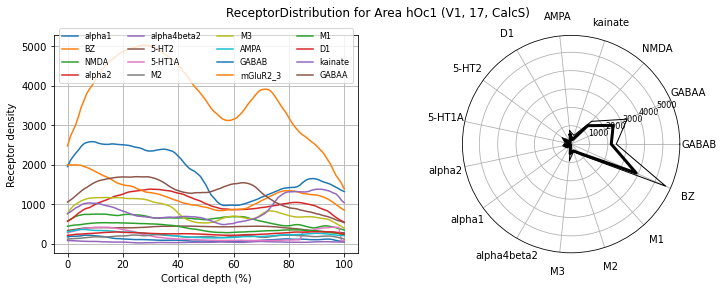

In [5]:
# When providing a particular region instead, the returned list is filtered accordingly. 
# So we can directly retrieve densities for the primary visual cortex:
v1_features = siibra.get_features(atlas.get_region('v1'), siibra.modalities.ReceptorDistribution)
for f in v1_features:
    fig = f.plot()

In [6]:
# Each feature includes a data structure for the fingerprint, with mean and
# standard values for different receptors. The following table thus gives
# us the same values as shown in the polar plot above:
fp = v1_features[0].fingerprint
for label, mean, std in zip(fp.labels, fp.meanvals, fp.stdvals):
    print(f"{label:20.20} {mean:10.0f} {fp.unit}      +/-{std:4.0f}")

AMPA                        500 fmol/mg      +/- 223
kainate                     260 fmol/mg      +/- 239
NMDA                       1348 fmol/mg      +/- 320
GABAA                      2508 fmol/mg      +/- 828
GABAB                      2187 fmol/mg      +/- 274
BZ                         3882 fmol/mg      +/-1761
M1                          661 fmol/mg      +/- 123
M2                          390 fmol/mg      +/-  35
M3                          524 fmol/mg      +/- 395
alpha4beta2                  48 fmol/mg      +/-  14
alpha1                      264 fmol/mg      +/-  59
alpha2                      347 fmol/mg      +/- 120
5-HT1A                      192 fmol/mg      +/- 145
5-HT2                       408 fmol/mg      +/- 198
D1                          102 fmol/mg      +/-  37


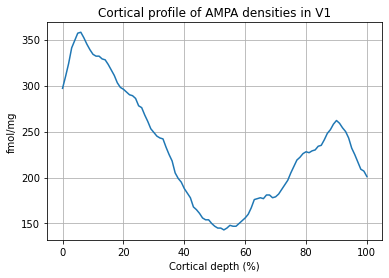

In [7]:
# Many of the receptor features also provide a profile of density measurements
# at different cortical depths, resolving the change of
# distribution from the white matter towards the pial surface.
# The profile is stored as a dictionary of density measures from 0 to 100%
# cortical depth.
p_ampa = v1_features[0].profiles['AMPA']
import matplotlib.pyplot as plt
plt.plot(p_ampa.densities.keys(), p_ampa.densities.values())
plt.title(f"Cortical profile of AMPA densities in V1")
plt.xlabel("Cortical depth (%)")
plt.ylabel(p_ampa.unit)
plt.grid(True)

Text(0.5, 1.0, 'Sample color-coded autoradiography patch for AMPA in V1')

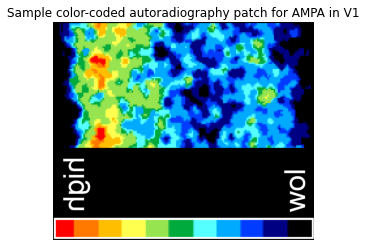

In [8]:
# Lastly, many receptor features provide a sample 2D cortical patch of the
# color-coded autoradiograph for illustration.
img = v1_features[0].autoradiographs['AMPA']
plt.imshow(img)
plt.axis('off')
plt.title(f"Sample color-coded autoradiography patch for AMPA in V1")

In [9]:
d = all_features[2]
d

In [10]:
d.fingerprint.labels

['AMPA',
 'kainate',
 'NMDA',
 'mGluR2_3',
 'GABAA',
 'GABAB',
 'BZ',
 'M1',
 'M2',
 'M3',
 'alpha4beta2',
 'alpha1',
 'alpha2',
 '5-HT1A',
 '5-HT2',
 'D1']

In [11]:
d.profiles

{'alpha1': <siibra.features.receptors.DensityProfile at 0x1d4e73b4b48>,
 'NMDA': <siibra.features.receptors.DensityProfile at 0x1d4e73b4ec8>,
 '5-HT2': <siibra.features.receptors.DensityProfile at 0x1d4e73b4f48>,
 'D1': <siibra.features.receptors.DensityProfile at 0x1d4e73b4fc8>,
 'BZ': <siibra.features.receptors.DensityProfile at 0x1d4e73dadc8>,
 'GABAB': <siibra.features.receptors.DensityProfile at 0x1d4e73ca3c8>,
 'M2': <siibra.features.receptors.DensityProfile at 0x1d4e73ca288>,
 'alpha2': <siibra.features.receptors.DensityProfile at 0x1d4e73caf08>,
 'AMPA': <siibra.features.receptors.DensityProfile at 0x1d4e73ca208>,
 'GABAA': <siibra.features.receptors.DensityProfile at 0x1d4e73daa08>,
 '5-HT1A': <siibra.features.receptors.DensityProfile at 0x1d4e73da908>,
 'alpha4beta2': <siibra.features.receptors.DensityProfile at 0x1d4e73da988>,
 'kainate': <siibra.features.receptors.DensityProfile at 0x1d4e73b4908>,
 'M1': <siibra.features.receptors.DensityProfile at 0x1d4e778e088>}

In [12]:
d.profiles['alpha1'].unit

'fmol/mg'